matplotlib

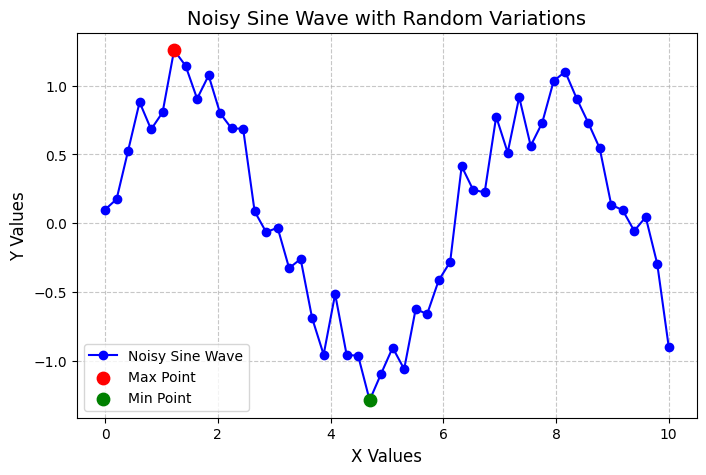

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the plot
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(scale=0.2, size=50)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
ax.plot(x, y, marker='o', linestyle='-', color='b', label='Noisy Sine Wave')

# Add labels and title
ax.set_xlabel("X Values", fontsize=12)
ax.set_ylabel("Y Values", fontsize=12)
ax.set_title("Noisy Sine Wave with Random Variations", fontsize=14)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Highlight max and min points
ax.scatter(x[np.argmax(y)], max(y), color='red', label='Max Point', s=80, zorder=3)
ax.scatter(x[np.argmin(y)], min(y), color='green', label='Min Point', s=80, zorder=3)

# Add a legend
ax.legend()

# Show the plot
plt.show()

seaborn

In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset('tips')
df = df.sample(n=50, random_state=1)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3


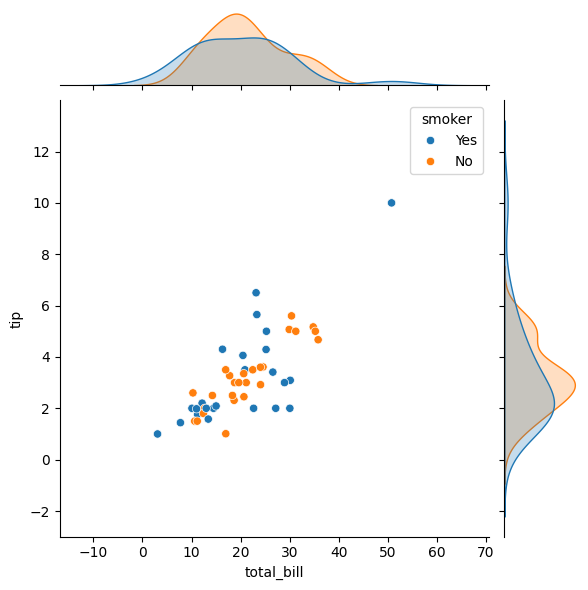

In [5]:
sns.jointplot(data=df, y='tip', x='total_bill', hue='smoker')
plt.show()

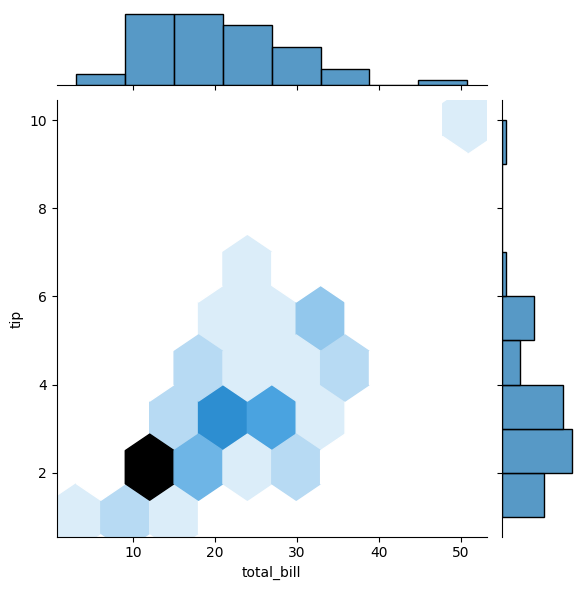

In [6]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='hex')
plt.show()

scikit learn

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Change settings to improve default style 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

data path

In [10]:
data_path = r'N:\Users\soyak\OneDrive\Documents\m32895\inputs\raw_data\medical-charges.csv'

load data

In [11]:
medical_df = pd.read_csv(data_path)

FileNotFoundError: [Errno 2] No such file or directory: 'N:\\Users\\soyak\\OneDrive\\Documents\\m32895\\inputs\\raw_data\\medical-charges.csv'

correlation

In [12]:
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))

NameError: name 'medical_df' is not defined

In [13]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df['charges'].corr(smoker_numeric)

NameError: name 'medical_df' is not defined

correlation matrix

In [14]:
medical_df.select_dtypes(include='number').corr()

NameError: name 'medical_df' is not defined

heat map

In [15]:
sns.heatmap(
    medical_df.select_dtypes(include='number').corr(),
    cmap='Reds',
    annot=True    
)
plt.title("Correlation matrix")
plt.show()

NameError: name 'medical_df' is not defined

linear regression with scikit llearn

import scikit learn module

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [19]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no'] # Either line will work. Just different syntaxes; But I like no 1 more.
non_smoker_df.head(3)

NameError: name 'medical_df' is not defined

In [20]:
inputs = non_smoker_df[['age']] # required to be 2D array. We want a dataframe, not a series.
targets = non_smoker_df['charges'] # There is only one dependent variable => no 2D notation is required.
print("Inputs shape", inputs.shape) # Output: (1064, 1) -> First number is how many lines; 2nd number is how many columns.
print("targets", targets.shape)

NameError: name 'non_smoker_df' is not defined

In [21]:
model.fit(input, targets)

NameError: name 'targets' is not defined

In [22]:
model.predict(np.array([
    [23],
    [37],
    [61]
]))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [23]:
predictions = model.predict(inputs)
print(predictions)

NameError: name 'inputs' is not defined

Compute RMSE

In [24]:
def rmse(targets, predictions):
    """
    Returns RMSE for targets and prediction values.
    """
    return np.sqrt(np.mean(np.square(predictions - targets)))

In [25]:
rmse(targets, predictions) # Output USD 4662.5. Meaning on average we are away from the target by this number.

NameError: name 'targets' is not defined

model coefficients

In [26]:
# w:
print(model.coef_)
# b:
print(model.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

machine learning

In [27]:
# Create inputs and targets:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
# Create and train the model:
model = LinearRegression().fit(inputs, targets)
# Run predictions:
predictions = model.predict(inputs)  # inputs [[22, 20]]
print(f"Predicted charge is: {predictions}")
# Compute loss to evaluate model:
loss = rmse(targets, predictions)
print(f"The loss is: {round(loss, 2)}")

NameError: name 'non_smoker_df' is not defined

In [28]:
inputs.head()

NameError: name 'inputs' is not defined

In [29]:
non_smoker_df['charges'].corr(non_smoker_df['bmi'])

NameError: name 'non_smoker_df' is not defined

In [30]:
fig = px.scatter(
    non_smoker_df,
    x='bmi',
    y='charges',
    title="BMI vs. Charges"
)
fig.update_traces(marker_size=5)
fig.show()

NameError: name 'non_smoker_df' is not defined

In [31]:
fig = px.scatter_3d(
    non_smoker_df,
    x='age',
    y='bmi',
    z='charges'
)
fig.update_traces(marker_size=3, marker_opacity=0.8)
fig.show()

NameError: name 'non_smoker_df' is not defined